## Finding a mininum value in a classical data set using Grover/Durr-Hoyer Algorithm



#### The algorithm consists of making tests on the most significant qubits of the measured values (current minimum). It works as the following example

#### data = [13,11,8,5,7,15,4,6]  ----  (let's suppose that our register is composed by 6 qubits)


#### create a qRAM to store classical data into quantum states.



#### initial_value = 8 = 001000 (binary - 6 qubits)

### *1) First test: Search for numbers that the most significant bits is 000_ _ _ .*

#### Grover's Algorithm will increase amplitudes of 5 (000101) , and 7 (000111), and 6 (000110) at the same time which are less than 8 (0001000)

#### Measurement --- let's suppose we get 6 (000110)

### *2) Second test: Search for numbers that the most significant bits is 0000 _ _ .*

#### Grover's Algorithm doesn't work in this case because there is no marked states. This show us the mininum is a binary number like this 0001 _ _.

### *3) Third test: Search for numbers like 00010_*

#### Grover's Algorithm will increase amplitudes of 5 (*00010*1) and 4 (*00010*0) whit equal probabilities.

#### let's suppose we measure 5. Then we know that minimum can be 5 or 4.

### *4) Last test: Search for 4 (000100)*

#### Grover's will increase amplitude of state |000100> to approximately 1. So we will measure the mininum


#### Classical algorithm to search a mininum has time complexity O(N). The algorithm bellow has time complexity $O(c\sqrt{N})$ where $c$ is the number of bits of initial_value



In [1]:
import qiskit
from qiskit import *
import numpy as np
import random
from random import choice
from qiskit.visualization import *
simulator = Aer.get_backend('qasm_simulator')

In [2]:
cost_list = [241,708,647,179,1023,1020,1021,1022]
T = [[0,0,1,1,1,1,0,0,0,1],[1,0,1,1,0,0,0,1,0,0],[1,0,1,0,0,0,0,1,1,1],[0,0,1,0,1,1,0,0,1,1],[1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,1,0,1],[1,1,1,1,1,1,1,1,1,0]]

In [3]:
reg1 = 3 #stores indexes values 'j'
reg2 = 10 #stores T(j) generating sum |j>|T(j)>
aux = 1 #ancilla
n = reg1+reg2+aux

In [4]:

def qram():
    #cost_list = []
    mem = QuantumCircuit(n)
    # |0>|8> = |000>|1000>
    mem.x([0,1,2])
    for i in range(reg2):
        if(T[0][i]==1):
            mem.mct([0,1,2],3+i)
    mem.x([0,1,2])
    mem.barrier()
    
    # |1>|13> = |001>|1101>
    mem.x([0,1])
    for i in range(reg2):
        if(T[1][i]==1):
            mem.mct([0,1,2],3+i)
    mem.x([0,1])
    mem.barrier()
    
    # |2>|10> = |010>|1010>
    mem.x([0,2])
    for i in range(reg2):
        if(T[2][i]==1):
            mem.mct([0,1,2],3+i)
    mem.x([0,2])
    mem.barrier()
    
    # |3>|15> = |011>|1111>
    mem.x([0])
    for i in range(reg2):
        if(T[3][i]==1):
            mem.mct([0,1,2],3+i)
    mem.x([0])
    mem.barrier()  
    
    # |2>|10> = |010>|1010>
    mem.x([1,2])
    for i in range(reg2):
        if(T[4][i]==1):
            mem.mct([0,1,2],3+i)
    mem.x([1,2])
    mem.barrier()

    
    mem.x([1])
    for i in range(reg2):
        if(T[5][i]==1):
            mem.mct([0,1,2],3+i)
    mem.x([1])
    mem.barrier()
    
    mem.x([2])
    for i in range(reg2):
        if(T[6][i]==1):
            mem.mct([0,1,2],3+i)
    mem.x([2])
    mem.barrier()
    
    
    for i in range(reg2):
        if(T[7][i]==1):
            mem.mct([0,1,2],3+i)
    
    


    
    mem.barrier()
    return mem



#############################################################


def diffuser():
    
    diff = QuantumCircuit(reg1)
    diff.h(range(reg1))
    diff.x(range(reg1))
    diff.h(reg1-1)
    diff.mct([0,1],2)
    diff.h(reg1-1)
    diff.x(range(reg1))
    diff.h(range(reg1))
    diff.barrier()
    
    return diff

In [5]:
'''
cost_list = [8,13,10,15,7,12,2,5]
T = [[1,0,0,0],[1,1,0,1],[1,0,1,0],[1,1,1,1], [0,1,1,1], [1,1,0,0],[0,0,1,0],[0,1,0,1]]
'''

'\ncost_list = [8,13,10,15,7,12,2,5]\nT = [[1,0,0,0],[1,1,0,1],[1,0,1,0],[1,1,1,1], [0,1,1,1], [1,1,0,0],[0,0,1,0],[0,1,0,1]]\n'

In [6]:
current_min = np.random.choice(cost_list)
pos = cost_list.index(current_min)
control=[]
control2=[]
count = []
curr_min = []
current_min


241

In [7]:
for i in range(reg2):
    if(T[pos][i]==0):
        control.append(i+reg1)
        control2.append(i+reg1)
    if(T[pos][i]==1):
        control.append(i+reg1)
        control2.append(i+reg1)
        break


In [8]:
control

[3, 4, 5]

In [9]:
control2

[3, 4, 5]

In [10]:
print(current_min)
print(control,control2)
for i in range(reg2):
    
    qc=QuantumCircuit(n,reg1)
    
    # INITIALIZE
    qc.h(range(reg1))
    qc.x(n-1)
    qc.h(n-1)
    qc.barrier()
    # END INITIALIZE
    
    
    ################### FIRST GROVER ITERATION ##########################
    
    # STORES cost_list in reg2
    qc = qc.compose(qram())
    # END STORAGE
    
    
    # FLIP PHASE
    qc.x(control2)
    qc.mct(control,n-1)
    qc.x(control2)
    qc.barrier()
    # END FLIP PHASE
    
    
    # UNCOMPUTE qRAM
    qc = qc.compose(qram())
    # END UNCOMPUTE
    
    
    # DIFFUSER
    qc = qc.compose(diffuser())
    # END DIFFUSER
    
    
    '''################### SECOND GROVER ITERATION ##########################
    
        
    # STORES cost_list in reg2
    qc = qc.compose(qram())
    # END STORAGE
    
    
    # FLIP PHASE
    qc.x(control2)
    qc.mct(control,n-1)
    qc.x(control2)
    qc.barrier()
    # END FLIP PHASE
    
    # UNCOMPUTE qRAM
    qc = qc.compose(qram())
    # END UNCOMPUTE
    
    
    # DIFFUSER
    qc = qc.compose(diffuser())
    # END DIFFUSER
    
    '''
    ############################# END GROVER ITERATIONS #############################
    
    # CHANGE ORDER OF QUBITS
    qc.swap(0,2)
    
    
    # MEASUREMENT
    qc.measure(range(reg1),range(reg1))
    
    # EXECUTE
    counts = execute(qc, backend=simulator, shots=1).result().get_counts(qc)
    
    # BINARY TO DECIMAL
    for measured_value in counts:
        a=int(measured_value[::1], 2)
    
    print(control,control2)
    print('index=', a)
    print('current min=', cost_list[a])
    if((cost_list[a]<current_min) and (len(count)==0)):
        
        current_min = cost_list[a]
        
        
        control.append(len(control)+reg1)
        control2.append(len(control2)+reg1)
        
    elif(cost_list[a]>=current_min):
        
        count.append(0)
        
        control.append(len(control)+reg1)
        
        if(len(count)==1):
            control2[len(control2)-1]=control2[len(control2)-1]+1
        
        else:
            control2.append(control2[len(control2)-1]+1)
    
    if(control[len(control)-1]==12):
        break
        
    curr_min.append(cost_list[a])
    
        
    

241
[3, 4, 5] [3, 4, 5]
[3, 4, 5] [3, 4, 5]
index= 2
current min= 647
[3, 4, 5, 6] [3, 4, 6]
index= 3
current min= 179
[3, 4, 5, 6] [3, 4, 6]
index= 3
current min= 179
[3, 4, 5, 6] [3, 4, 6]
index= 3
current min= 179
[3, 4, 5, 6] [3, 4, 6]
index= 0
current min= 241
[3, 4, 5, 6, 7] [3, 4, 6, 7]
index= 6
current min= 1021
[3, 4, 5, 6, 7, 8] [3, 4, 6, 7, 8]
index= 6
current min= 1021
[3, 4, 5, 6, 7, 8, 9] [3, 4, 6, 7, 8, 9]
index= 1
current min= 708
[3, 4, 5, 6, 7, 8, 9, 10] [3, 4, 6, 7, 8, 9, 10]
index= 2
current min= 647
[3, 4, 5, 6, 7, 8, 9, 10, 11] [3, 4, 6, 7, 8, 9, 10, 11]
index= 6
current min= 1021


In [23]:

'''cost_list
print(T)


print(ind)'''

mini = min(curr_min)
print('minimum distance: ',mini)


minimum distance:  179


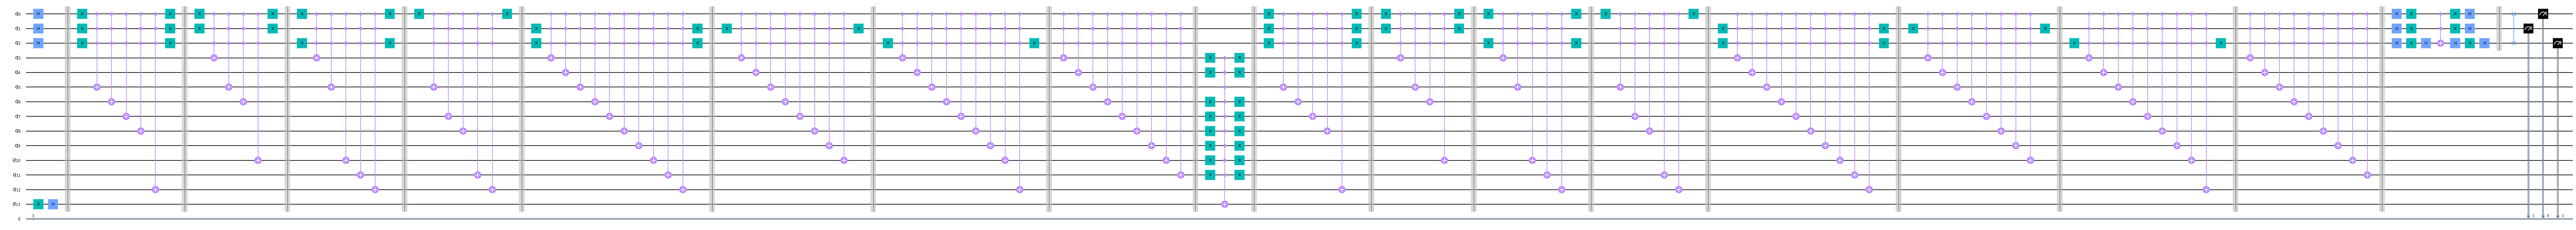

In [12]:
qc.draw('mpl',fold=-1)

In [17]:
#counts = execute(qc, backend=simulator, shots=1000).result().get_counts(qc)

In [18]:
#plot_histogram(counts)

In [19]:
#control

In [20]:
#control2
